### Machine Learning: Principal Component Analysis
___

#### Summary:
Principal Component Analysis is a dimensionality reduction algorithm. It creates new features from the 
current features where the number of new features is less than the number of original features. The new
features are constructed in a way that retain most of the variance. PCA is useful for data compression 
and visualizing data on a 2D plane or a 3D space. In this notebook we derive the PCA algorithm as well 
as use the already existing PCA algorithm from sklearn.
___
#### This notebook will include:
1. PCA derivation
2. PCA w/ sklearn
___
#### Reference: 

Much of what is in this notebook was learned from the Machine Learning Coursera course by Andrew Ng.

In [185]:
# Example Dataset
"""
The dataset that we will be using to test the PCA algorithm contains 12 examples with 3 input features.
"""
# Importing the libraries
import numpy as np

# Creating the dataset
X = np.array([[10,20,9.8],[15,33,9.6],[2.5, 5, 9.9], [4.8, 10, 9.8], [7.6,15,9.8],[9, 19, 9.7],
             [3.2,6.5,9.8],[12.1,24,9.5],[14.5, 28, 9.6], [7.8, 16, 9.7], [17.6,35,9.9],[6, 11.8, 9.7]])

# Printing the dataset shape
print('X:', X.shape)

X: (12, 3)


In [186]:
# Principal Component Analysis
"""
In this section we define the PCA function using simple numpy functions. This particular PCA algorithm
will retain 99% variance unless it is given a value for n_components when called. The function will
print out the number of principal components and the percent variance retained. And it will return the
data with its new features, and a reconstruction of the original data.
"""
def PCA(X, n_components = None):
    
    # Importing the libraries
    import numpy as np
    
    # Singular Value Decomposition 
    cov = np.cov(np.transpose(X))
    U, s, V = np.linalg.svd(cov) # U = eigenvectors, s = eigenvalues
    
    # Choosing the number of principal components
    # Option 1: 99% variance retained
    if n_components == None:
        den = np.sum(s)
        num = 0
        for i in range (s.shape[0]):
            num = num + s[i]
            if num / den >= 0.99:
                break
        pc = i + 1
        print('\nVariance retained:', num / den)
    
    # Option 2: n_components
    else:
        pc = n_components
        den = np.sum(s)
        num = 0
        for i in range (0, pc):
            num = num + s[i]
        print('Variance retained:', num / den)
    
    # Printing the number of principal components
    print('Number of principal components:', pc)
    
    # Obtaining the principal components
    U_reduced = U[:, :pc]
    
    # Creating the new X
    X_new = np.matmul(X, U_reduced)
    
    # Reconstructing the original X
    X_approx = np.matmul(X_new, np.transpose(U_reduced))
    
    # Returns the new X and the reconstructed X
    return X_new, X_approx

In [187]:
# Principal Component Analysis
"""
Test the PCA algorithm above and compare the original data X with the new X and the reconstructed X.
Usually we scale the data X before applying PCA.
"""
# Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Printing the original data X
print('Original X:\n', X)

# Printing the scaled data X
print('\nX scaled:\n', X_scaled)

# Applying PCA to scaled X
X_scaled_new, X_scaled_approx = PCA(X_scaled)

# Printing the new scaled X
print('\nNew X scaled:\n', X_scaled_new)

# Printing the reconstructed scaled X
print('\nReconstruction of X scaled:\n', X_scaled_approx)

# Printing the reconstructed original X
print('\nReconstruction of original X:\n', scaler_X.inverse_transform(X_scaled_approx))

Original X:
 [[ 10.   20.    9.8]
 [ 15.   33.    9.6]
 [  2.5   5.    9.9]
 [  4.8  10.    9.8]
 [  7.6  15.    9.8]
 [  9.   19.    9.7]
 [  3.2   6.5   9.8]
 [ 12.1  24.    9.5]
 [ 14.5  28.    9.6]
 [  7.8  16.    9.7]
 [ 17.6  35.    9.9]
 [  6.   11.8   9.7]]

X scaled:
 [[ 0.17848445  0.14756825  0.56568542]
 [ 1.26020838  1.52605014 -1.13137085]
 [-1.44410145 -1.44298777  1.41421356]
 [-0.94650844 -0.91280243  0.56568542]
 [-0.34074304 -0.38261709  0.56568542]
 [-0.03786034  0.04153118 -0.28284271]
 [-1.2926601  -1.28393217  0.56568542]
 [ 0.6328085   0.57171653 -1.97989899]
 [ 1.15203599  0.9958648  -1.13137085]
 [-0.29747408 -0.27658002 -0.28284271]
 [ 1.82270483  1.73812427  1.41421356]
 [-0.6868947  -0.7219357  -0.28284271]]

Variance retained: 0.998396922998
Number of principal components: 2

New X scaled:
 [[ 0.01641276 -0.61085049]
 [-2.25912849  0.24567843]
 [ 2.43782797 -0.47385077]
 [ 1.43118265  0.0110265 ]
 [ 0.69583557 -0.31255639]
 [-0.11620471  0.25853293]
 [ 1.8

In [188]:
# PCA w/ sklearn
"""
Here instead of using our own function, we apply PCA from the sklearn library.
"""
# Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Printing the original data X
print('Original X:\n', X)

# Printing the scaled data X
print('\nX scaled:\n', X_scaled)

# Creating and fitting PCA to the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_scaled_new = pca.fit_transform(X_scaled)
X_scaled_approx = pca.inverse_transform(X_scaled_new)

# Printing the percent variance retained and the number of principal components
print('\nVariance retained:', np.sum(pca.explained_variance_ratio_))
print('Number of principal components:', pca.n_components_)

# Printing the new scaled X
print('\nNew X scaled:\n', X_scaled_new)

# Printing the reconstructed scaled X
print('\nReconstruction of X scaled:\n', X_scaled_approx)

# Printing the reconstructed original X
print('\nReconstruction of original X:\n', scaler_X.inverse_transform(X_scaled_approx))

Original X:
 [[ 10.   20.    9.8]
 [ 15.   33.    9.6]
 [  2.5   5.    9.9]
 [  4.8  10.    9.8]
 [  7.6  15.    9.8]
 [  9.   19.    9.7]
 [  3.2   6.5   9.8]
 [ 12.1  24.    9.5]
 [ 14.5  28.    9.6]
 [  7.8  16.    9.7]
 [ 17.6  35.    9.9]
 [  6.   11.8   9.7]]

X scaled:
 [[ 0.17848445  0.14756825  0.56568542]
 [ 1.26020838  1.52605014 -1.13137085]
 [-1.44410145 -1.44298777  1.41421356]
 [-0.94650844 -0.91280243  0.56568542]
 [-0.34074304 -0.38261709  0.56568542]
 [-0.03786034  0.04153118 -0.28284271]
 [-1.2926601  -1.28393217  0.56568542]
 [ 0.6328085   0.57171653 -1.97989899]
 [ 1.15203599  0.9958648  -1.13137085]
 [-0.29747408 -0.27658002 -0.28284271]
 [ 1.82270483  1.73812427  1.41421356]
 [-0.6868947  -0.7219357  -0.28284271]]

Variance retained: 0.998396922998
Number of principal components: 2

New X scaled:
 [[ 0.01641276  0.61085049]
 [-2.25912849 -0.24567843]
 [ 2.43782797  0.47385077]
 [ 1.43118265 -0.0110265 ]
 [ 0.69583557  0.31255639]
 [-0.11620471 -0.25853293]
 [ 1.8

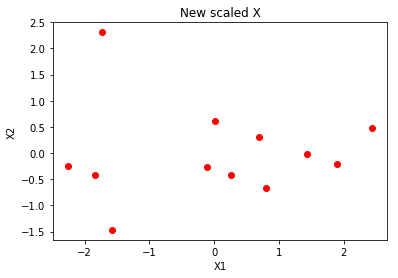

In [190]:
# Visualizing new data X
"""
One of the main reasons PCA is used is to lower the dimension of some dataset so that it can be
visualized on a 2D plane. Here we plot the new scaled X calculated above.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the new scaled data X
plt.plot(X_scaled_new[:, 0], X_scaled_new[:, 1], 'ro')

plt.title('New scaled X')
plt.xlabel('X1')
plt.ylabel('X2')